In [1]:
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Dense,Flatten,Dropout,Conv2D,BatchNormalization,Input
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [3]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

model = Sequential()
# Input
model.add(Input(shape=(32, 32, 3)))
# Layer 1 [-22]
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Layer 2 [-18]
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
# Layer 3 [-16]
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Layer 4 [-12]
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
# Layer 5 [-10]
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
# Layer 6 [-6]
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
# Layer 7 [-2]
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Output
model.add(Dense(10, activation='softmax'))

opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=callback)

(50000, 10)
(10000, 10)
Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.5601 - accuracy: 0.4617 - val_loss: 1.0860 - val_accuracy: 0.6119
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0554 - accuracy: 0.6304 - val_loss: 0.8402 - val_accuracy: 0.7027
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8887 - accuracy: 0.6917 - val_loss: 0.7437 - val_accuracy: 0.7374
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7901 - accuracy: 0.7275 - val_loss: 0.6835 - val_accuracy: 0.7593
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7074 - accuracy: 0.7588 - val_loss: 0.5845 - val_accuracy: 0.7953
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6565 - accuracy: 0.7750 - val_loss: 0.6196 - val_accuracy: 0.7871
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6057 - accuracy: 0.7929 - v

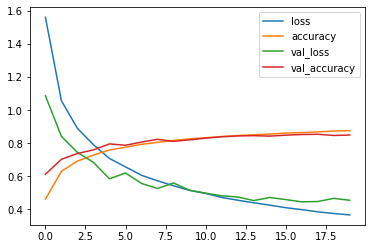

In [4]:
pd.DataFrame(history.history).plot()
plt.show()

In [5]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.8488
Test Accuracy: 0.848800003528595


Normalized confusion matrix
[[0.844 0.012 0.017 0.014 0.014 0.002 0.004 0.007 0.052 0.034]
 [0.004 0.92  0.    0.001 0.002 0.001 0.002 0.    0.008 0.062]
 [0.05  0.001 0.742 0.042 0.042 0.051 0.043 0.013 0.012 0.004]
 [0.011 0.004 0.033 0.668 0.037 0.141 0.051 0.015 0.021 0.019]
 [0.009 0.002 0.034 0.032 0.831 0.029 0.024 0.026 0.01  0.003]
 [0.009 0.002 0.018 0.083 0.023 0.815 0.013 0.025 0.004 0.008]
 [0.005 0.003 0.011 0.024 0.012 0.01  0.916 0.005 0.01  0.004]
 [0.009 0.002 0.008 0.02  0.021 0.036 0.003 0.885 0.003 0.013]
 [0.025 0.019 0.    0.004 0.001 0.001 0.002 0.002 0.934 0.012]
 [0.008 0.035 0.003 0.005 0.001 0.001 0.001 0.    0.013 0.933]]


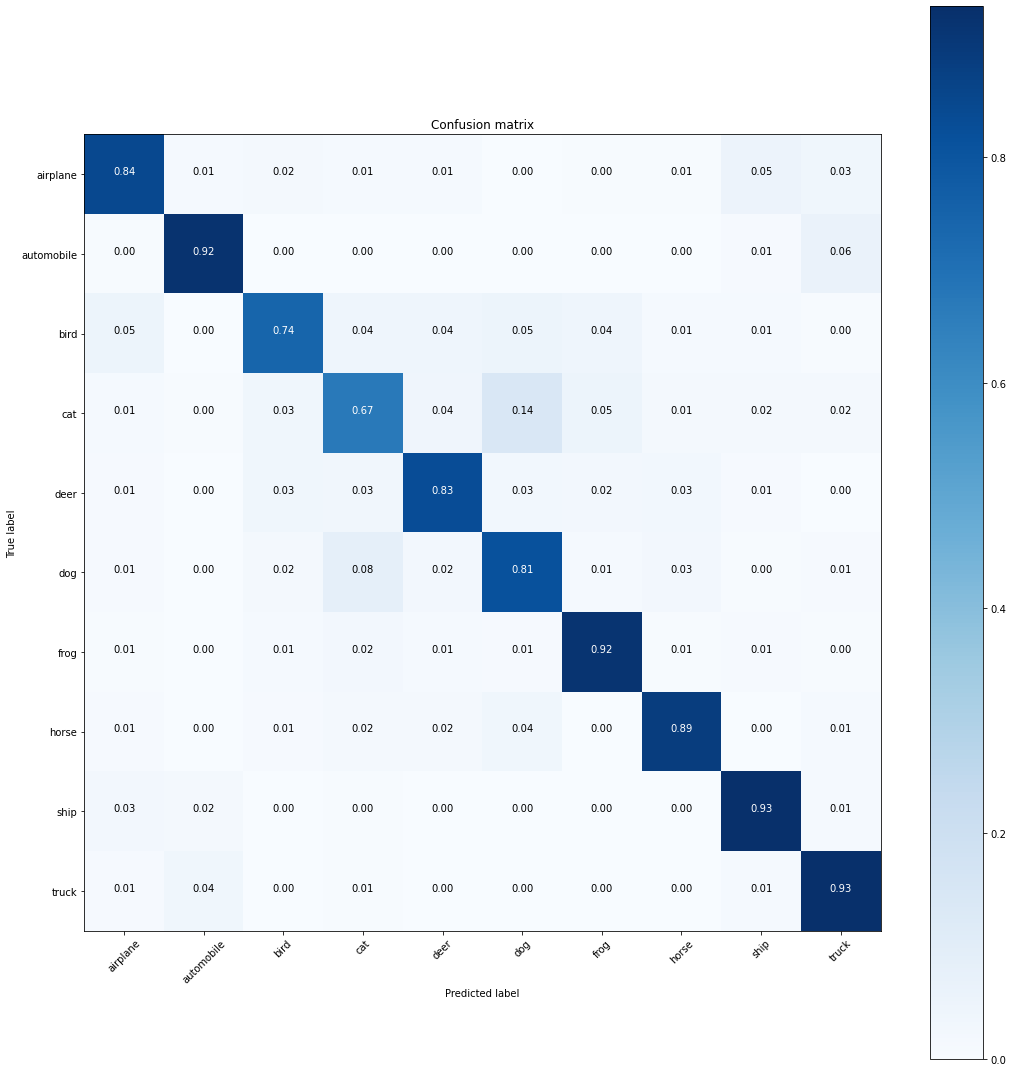

In [6]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],normalize=True)

In [7]:
model.save('./models/model.h5')

In [8]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
instances = []
images_path='./converted-augmented'
# Load in the images
for filepath in os.listdir(images_path):  
    image=( Image.open(images_path+"/"+filepath))
    data=np.asarray(image)
    if data.shape!=(32,32,3): 
        print(filepath)
        continue
    instances.append(data)

bobcats=np.stack(instances, axis=0)
print(bobcats.shape)
bobcat_group=np.arange(6000).reshape(6000,1)
bobcat_group.fill(10)
print(bobcat_group  .shape)
x_train=np.concatenate((x_train,bobcats[:5000,:,:,:]),axis=0)
x_test=np.concatenate((x_test,bobcats[5000:,:,:,:]),axis=0)
y_train=np.concatenate((y_train,bobcat_group[:5000]),axis=0)
y_test=np.concatenate((y_test,bobcat_group[5000:]),axis=0)


print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


a= to_categorical(y_train)

print('Shape of y_train after to_categorical is {}'.format(a.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,11)
y_test_cat=to_categorical(y_test,11)

print(y_train_cat.shape)
print(y_test_cat.shape)

(6000, 32, 32, 3)
(6000, 1)
Shape of x_train is (55000, 32, 32, 3)
Shape of x_test is (11000, 32, 32, 3)
Shape of y_train is (55000, 1)
Shape of y_test is (11000, 1)
Shape of y_train after to_categorical is (55000, 11)
(55000, 11)
(11000, 11)


In [9]:
import keras
model_transferred=keras.models.load_model('./models/model.h5')

In [10]:
model_transferred.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [11]:
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-2].output)

In [12]:
model_transferred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [13]:
new_model = keras.Sequential()
new_model.add(model_transferred)
new_model.add(Dense(11, activation='softmax'))

In [14]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 128)               551584    
                                                                 
 dense_2 (Dense)             (None, 11)                1419      
                                                                 
Total params: 553,003
Trainable params: 551,851
Non-trainable params: 1,152
_________________________________________________________________


In [15]:
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5438 - accuracy: 0.4947 - val_loss: 0.7444 - val_accuracy: 0.7660
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7048 - accuracy: 0.7736 - val_loss: 0.6260 - val_accuracy: 0.7848
Epoch 3/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5760 - accuracy: 0.8064 - val_loss: 0.6085 - val_accuracy: 0.7895
Epoch 4/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5327 - accuracy: 0.8169 - val_loss: 0.6021 - val_accuracy: 0.7940
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5072 - accuracy: 0.8232 - val_loss: 0.6030 - val_accuracy: 0.7954
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4985 - accuracy: 0.8237 - val_loss: 0.6005 - val_accuracy: 0.7961
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4924 - accuracy: 0.8284 - val_loss: 0.6005 - val_accuracy:

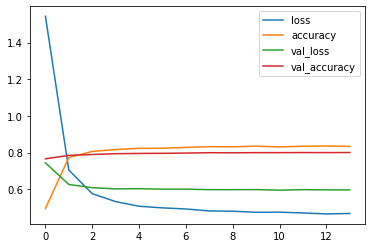

In [16]:
pd.DataFrame(history.history).plot()
plt.show()

In [17]:
tl_models_acc = []
fr_models_acc = []
tl_cat_acc = []
fr_cat_acc = []
tl_bobcat_acc = []
fr_bobcat_acc = []

344/344 [==============================] - 1s 3ms/step - loss: 0.5966 - accuracy: 0.8004
Test Accuracy: 0.8003636598587036
Normalized confusion matrix
[[0.862 0.01  0.02  0.01  0.014 0.    0.003 0.008 0.037 0.023 0.013]
 [0.005 0.928 0.    0.002 0.002 0.001 0.002 0.    0.01  0.05  0.   ]
 [0.043 0.001 0.729 0.025 0.051 0.044 0.033 0.013 0.007 0.004 0.05 ]
 [0.012 0.002 0.027 0.617 0.036 0.121 0.043 0.017 0.009 0.011 0.105]
 [0.008 0.002 0.023 0.016 0.833 0.018 0.019 0.018 0.005 0.002 0.056]
 [0.007 0.001 0.015 0.08  0.026 0.787 0.014 0.026 0.002 0.006 0.036]
 [0.005 0.002 0.014 0.014 0.007 0.006 0.909 0.005 0.006 0.003 0.029]
 [0.008 0.001 0.007 0.015 0.022 0.031 0.003 0.889 0.004 0.005 0.015]
 [0.03  0.018 0.001 0.002 0.001 0.002 0.003 0.002 0.922 0.012 0.007]
 [0.016 0.037 0.003 0.005 0.    0.    0.003 0.002 0.013 0.917 0.004]
 [0.022 0.002 0.02  0.12  0.14  0.019 0.231 0.008 0.014 0.013 0.411]]


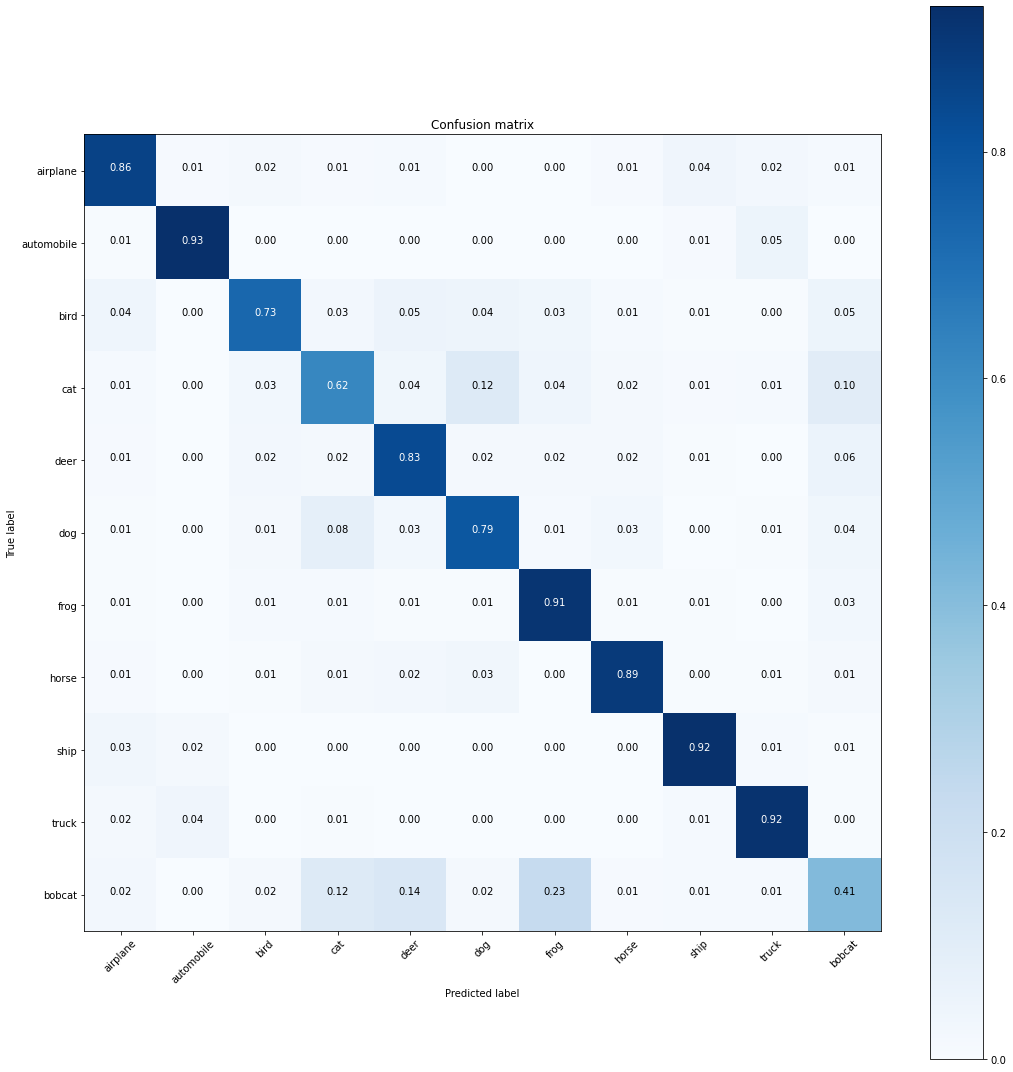

In [18]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [19]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-2].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 1.2078 - accuracy: 0.6035 - val_loss: 0.5851 - val_accuracy: 0.8107
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5478 - accuracy: 0.8256 - val_loss: 0.4929 - val_accuracy: 0.8374
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4371 - accuracy: 0.8554 - val_loss: 0.4721 - val_accuracy: 0.8480
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3940 - accuracy: 0.8693 - val_loss: 0.4560 - val_accuracy: 0.8547
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3671 - accuracy: 0.8785 - val_loss: 0.4429 - val_accuracy: 0.8605
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3426 - accuracy: 0.8850 - val_loss: 0.4339 - val_accuracy: 0.8644
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3257 - accuracy: 0.8907 - val_loss: 0.4260 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8799
Test Accuracy: 0.879909098148346
Normalized confusion matrix
[[0.881 0.007 0.02  0.01  0.012 0.001 0.003 0.004 0.041 0.018 0.003]
 [0.005 0.941 0.    0.002 0.002 0.    0.002 0.    0.009 0.039 0.   ]
 [0.046 0.    0.785 0.037 0.048 0.035 0.027 0.009 0.004 0.001 0.008]
 [0.014 0.004 0.028 0.732 0.039 0.105 0.04  0.014 0.007 0.007 0.01 ]
 [0.009 0.001 0.021 0.021 0.9   0.014 0.014 0.013 0.006 0.001 0.   ]
 [0.008 0.001 0.017 0.094 0.024 0.813 0.01  0.026 0.002 0.003 0.002]
 [0.004 0.    0.015 0.026 0.01  0.008 0.928 0.003 0.004 0.001 0.001]
 [0.007 0.    0.001 0.018 0.025 0.025 0.002 0.914 0.003 0.004 0.001]
 [0.021 0.006 0.002 0.001 0.003 0.    0.004 0.002 0.948 0.011 0.002]
 [0.012 0.033 0.002 0.005 0.001 0.001 0.    0.001 0.01  0.935 0.   ]
 [0.002 0.    0.005 0.035 0.018 0.002 0.029 0.001 0.003 0.003 0.902]]


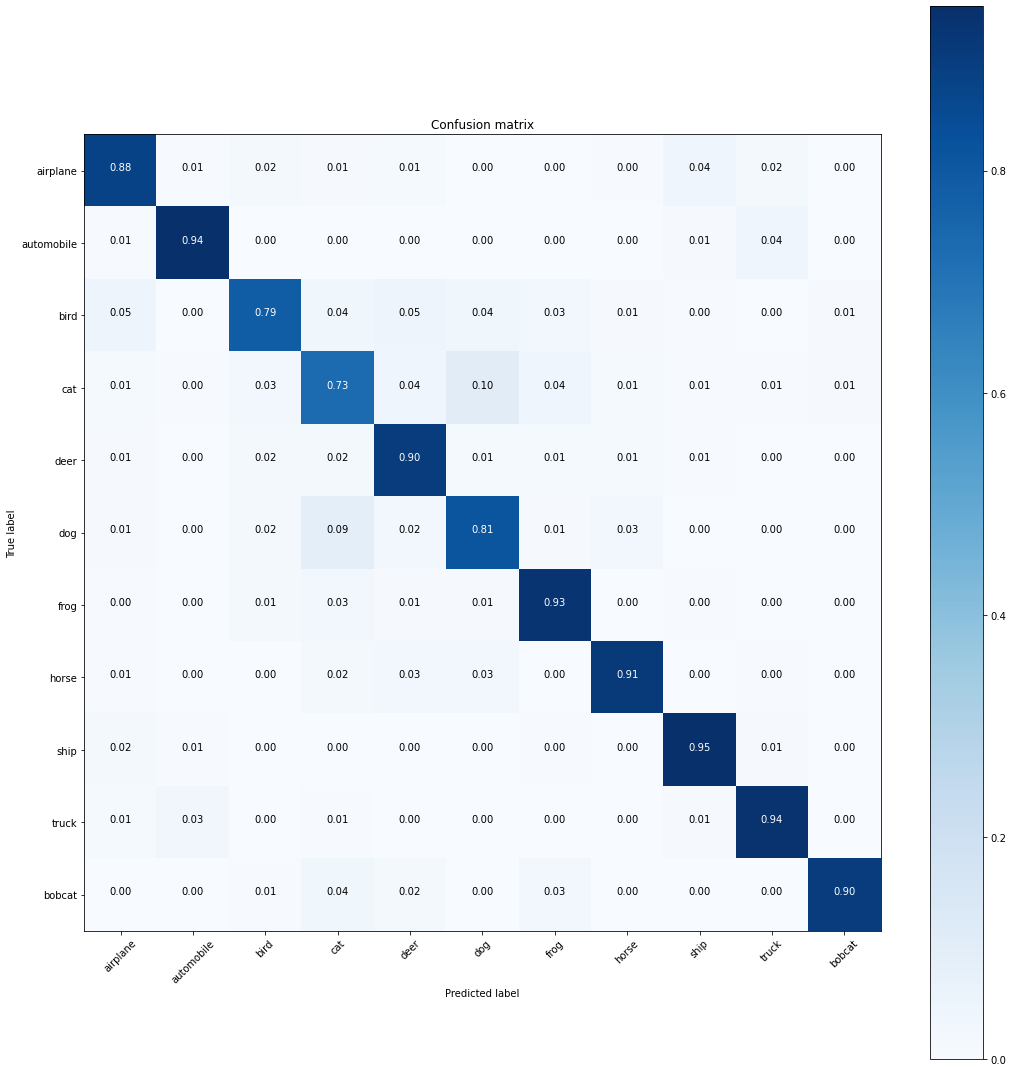

In [20]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [21]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-6].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 8s 5ms/step - loss: 2.5119 - accuracy: 0.2703 - val_loss: 1.2052 - val_accuracy: 0.6127
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.5244 - accuracy: 0.5095 - val_loss: 0.9280 - val_accuracy: 0.6965
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.1831 - accuracy: 0.6119 - val_loss: 0.8115 - val_accuracy: 0.7300
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0244 - accuracy: 0.6640 - val_loss: 0.7426 - val_accuracy: 0.7485
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9212 - accuracy: 0.6949 - val_loss: 0.7003 - val_accuracy: 0.7642
Epoch 6/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8478 - accuracy: 0.7173 - val_loss: 0.6720 - val_accuracy: 0.7734
Epoch 7/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7869 - accuracy: 0.7378 - val_loss: 0.6533 - val_accuracy:

344/344 [==============================] - 1s 3ms/step - loss: 0.5334 - accuracy: 0.8266
Test Accuracy: 0.8266363739967346
Normalized confusion matrix
[[0.86  0.008 0.025 0.008 0.009 0.001 0.003 0.007 0.041 0.028 0.01 ]
 [0.004 0.93  0.001 0.002 0.002 0.002 0.002 0.    0.009 0.047 0.001]
 [0.045 0.001 0.733 0.035 0.057 0.038 0.039 0.011 0.005 0.003 0.033]
 [0.013 0.002 0.024 0.668 0.043 0.114 0.053 0.015 0.009 0.011 0.048]
 [0.006 0.001 0.019 0.018 0.857 0.016 0.021 0.019 0.005 0.001 0.037]
 [0.009 0.    0.019 0.089 0.032 0.782 0.015 0.024 0.002 0.004 0.024]
 [0.005 0.002 0.009 0.025 0.01  0.007 0.916 0.004 0.003 0.    0.019]
 [0.006 0.    0.008 0.019 0.033 0.03  0.002 0.885 0.004 0.004 0.009]
 [0.031 0.013 0.002 0.003 0.001 0.002 0.003 0.    0.928 0.014 0.003]
 [0.017 0.033 0.003 0.006 0.002 0.001 0.004 0.001 0.014 0.918 0.001]
 [0.014 0.001 0.02  0.093 0.079 0.011 0.143 0.005 0.011 0.007 0.616]]


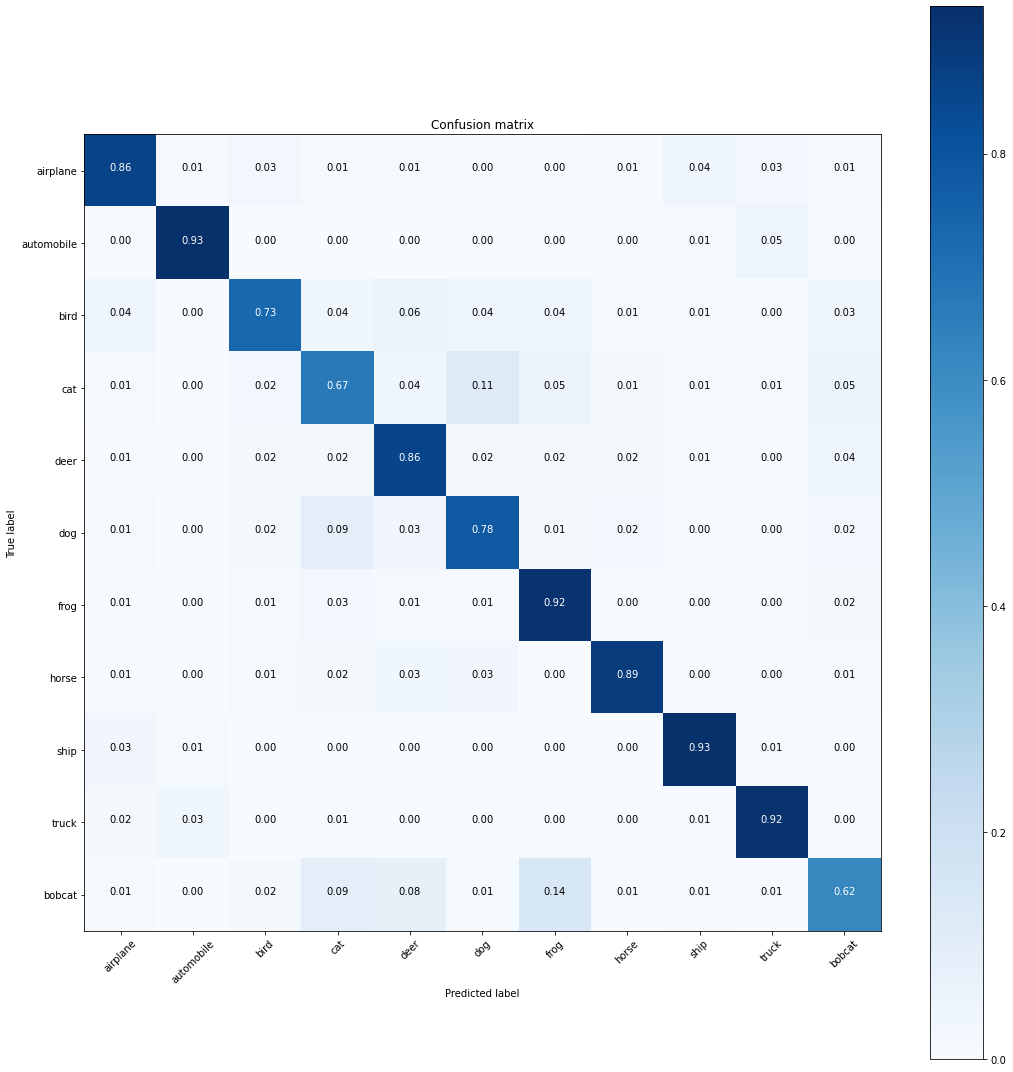

In [22]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [23]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-6].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.4829 - accuracy: 0.2864 - val_loss: 1.1054 - val_accuracy: 0.6270
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4761 - accuracy: 0.5241 - val_loss: 0.8324 - val_accuracy: 0.7155
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1352 - accuracy: 0.6245 - val_loss: 0.7260 - val_accuracy: 0.7520
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9584 - accuracy: 0.6811 - val_loss: 0.6706 - val_accuracy: 0.7709
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8635 - accuracy: 0.7137 - val_loss: 0.6329 - val_accuracy: 0.7846
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7846 - accuracy: 0.7396 - val_loss: 0.6097 - val_accuracy: 0.7945
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7364 - accuracy: 0.7556 - val_loss: 0.5896 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.8613
Test Accuracy: 0.8612727522850037
Normalized confusion matrix
[[0.878 0.009 0.021 0.005 0.009 0.002 0.003 0.006 0.038 0.023 0.006]
 [0.008 0.933 0.    0.002 0.002 0.    0.002 0.    0.009 0.044 0.   ]
 [0.048 0.    0.759 0.04  0.058 0.028 0.031 0.011 0.006 0.003 0.016]
 [0.014 0.003 0.028 0.711 0.037 0.106 0.047 0.012 0.008 0.008 0.026]
 [0.006 0.001 0.02  0.012 0.891 0.015 0.017 0.014 0.006 0.001 0.017]
 [0.008 0.001 0.019 0.089 0.024 0.804 0.016 0.027 0.001 0.003 0.008]
 [0.005 0.001 0.01  0.025 0.01  0.009 0.925 0.003 0.004 0.001 0.007]
 [0.007 0.    0.008 0.021 0.027 0.02  0.002 0.902 0.001 0.004 0.008]
 [0.029 0.009 0.    0.001 0.002 0.    0.004 0.001 0.938 0.013 0.003]
 [0.013 0.037 0.003 0.006 0.    0.    0.001 0.001 0.012 0.927 0.   ]
 [0.011 0.    0.017 0.051 0.038 0.004 0.063 0.003 0.004 0.003 0.806]]


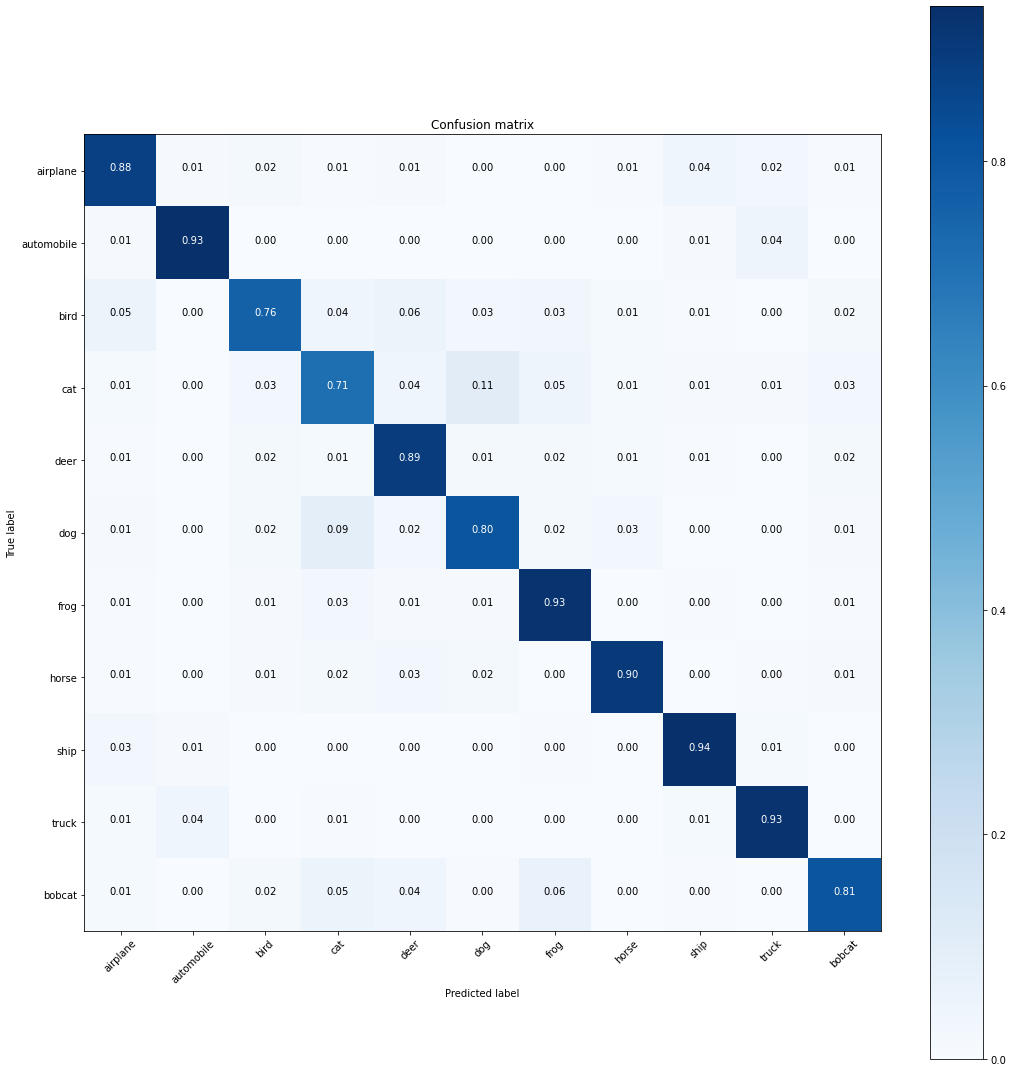

In [24]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [25]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-10].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 9s 5ms/step - loss: 2.8431 - accuracy: 0.2131 - val_loss: 1.5188 - val_accuracy: 0.4985
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.9385 - accuracy: 0.4034 - val_loss: 1.2009 - val_accuracy: 0.5966
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.5670 - accuracy: 0.5023 - val_loss: 1.0400 - val_accuracy: 0.6473
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.3724 - accuracy: 0.5591 - val_loss: 0.9461 - val_accuracy: 0.6793
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.2416 - accuracy: 0.5978 - val_loss: 0.8771 - val_accuracy: 0.7052
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.1397 - accuracy: 0.6309 - val_loss: 0.8310 - val_accuracy: 0.7201
Epoch 7/50
1719/1719 [==============================] - 8s 5ms/step - loss: 1.0752 - accuracy: 0.6510 - val_loss: 0.7840 - val_accuracy:

344/344 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.8283
Test Accuracy: 0.8282727003097534
Normalized confusion matrix
[[0.841 0.01  0.026 0.007 0.015 0.002 0.008 0.01  0.047 0.022 0.012]
 [0.01  0.91  0.001 0.001 0.003 0.002 0.003 0.    0.011 0.059 0.   ]
 [0.056 0.001 0.693 0.03  0.07  0.043 0.051 0.019 0.01  0.007 0.02 ]
 [0.018 0.002 0.038 0.614 0.047 0.137 0.059 0.02  0.012 0.01  0.043]
 [0.012 0.001 0.023 0.014 0.84  0.016 0.025 0.035 0.007 0.    0.027]
 [0.011 0.    0.025 0.087 0.03  0.776 0.014 0.031 0.    0.004 0.022]
 [0.006 0.001 0.013 0.022 0.011 0.011 0.911 0.006 0.003 0.    0.016]
 [0.007 0.    0.009 0.013 0.032 0.031 0.005 0.884 0.002 0.008 0.009]
 [0.028 0.014 0.003 0.001 0.    0.002 0.005 0.001 0.93  0.011 0.005]
 [0.021 0.036 0.003 0.004 0.001 0.001 0.003 0.004 0.019 0.905 0.003]
 [0.007 0.    0.018 0.041 0.039 0.005 0.066 0.009 0.005 0.003 0.807]]


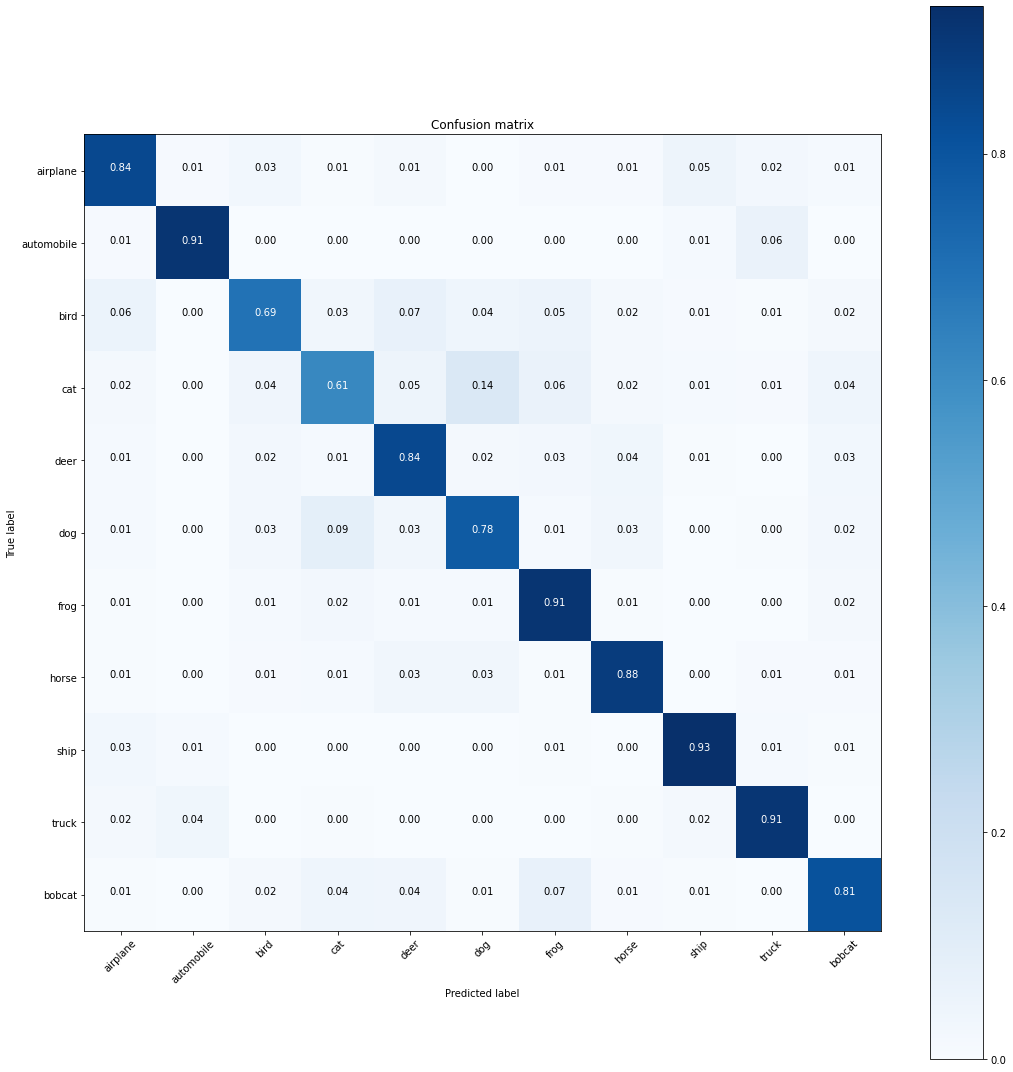

In [26]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [27]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-10].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.8617 - accuracy: 0.2135 - val_loss: 1.4552 - val_accuracy: 0.5065
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.9536 - accuracy: 0.3990 - val_loss: 1.1286 - val_accuracy: 0.6179
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.5627 - accuracy: 0.5024 - val_loss: 0.9723 - val_accuracy: 0.6667
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.3420 - accuracy: 0.5667 - val_loss: 0.8819 - val_accuracy: 0.6977
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2059 - accuracy: 0.6095 - val_loss: 0.8185 - val_accuracy: 0.7214
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.1072 - accuracy: 0.6382 - val_loss: 0.7762 - val_accuracy: 0.7370
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0331 - accuracy: 0.6621 - val_loss: 0.7407 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8513
Test Accuracy: 0.851272702217102
Normalized confusion matrix
[[0.863 0.007 0.019 0.008 0.015 0.002 0.006 0.008 0.048 0.013 0.011]
 [0.007 0.907 0.002 0.002 0.002 0.001 0.002 0.    0.018 0.058 0.001]
 [0.06  0.    0.728 0.032 0.067 0.029 0.043 0.014 0.006 0.002 0.019]
 [0.013 0.002 0.031 0.686 0.043 0.104 0.052 0.02  0.01  0.007 0.032]
 [0.009 0.001 0.017 0.02  0.864 0.014 0.024 0.025 0.005 0.    0.021]
 [0.009 0.    0.026 0.111 0.032 0.757 0.014 0.028 0.002 0.002 0.019]
 [0.006 0.    0.011 0.021 0.012 0.005 0.922 0.005 0.003 0.    0.015]
 [0.009 0.    0.009 0.016 0.035 0.022 0.005 0.892 0.    0.006 0.006]
 [0.036 0.009 0.004 0.001 0.004 0.001 0.007 0.    0.926 0.008 0.004]
 [0.02  0.03  0.002 0.005 0.001 0.    0.002 0.002 0.015 0.92  0.003]
 [0.006 0.    0.009 0.029 0.022 0.    0.028 0.003 0.001 0.003 0.899]]


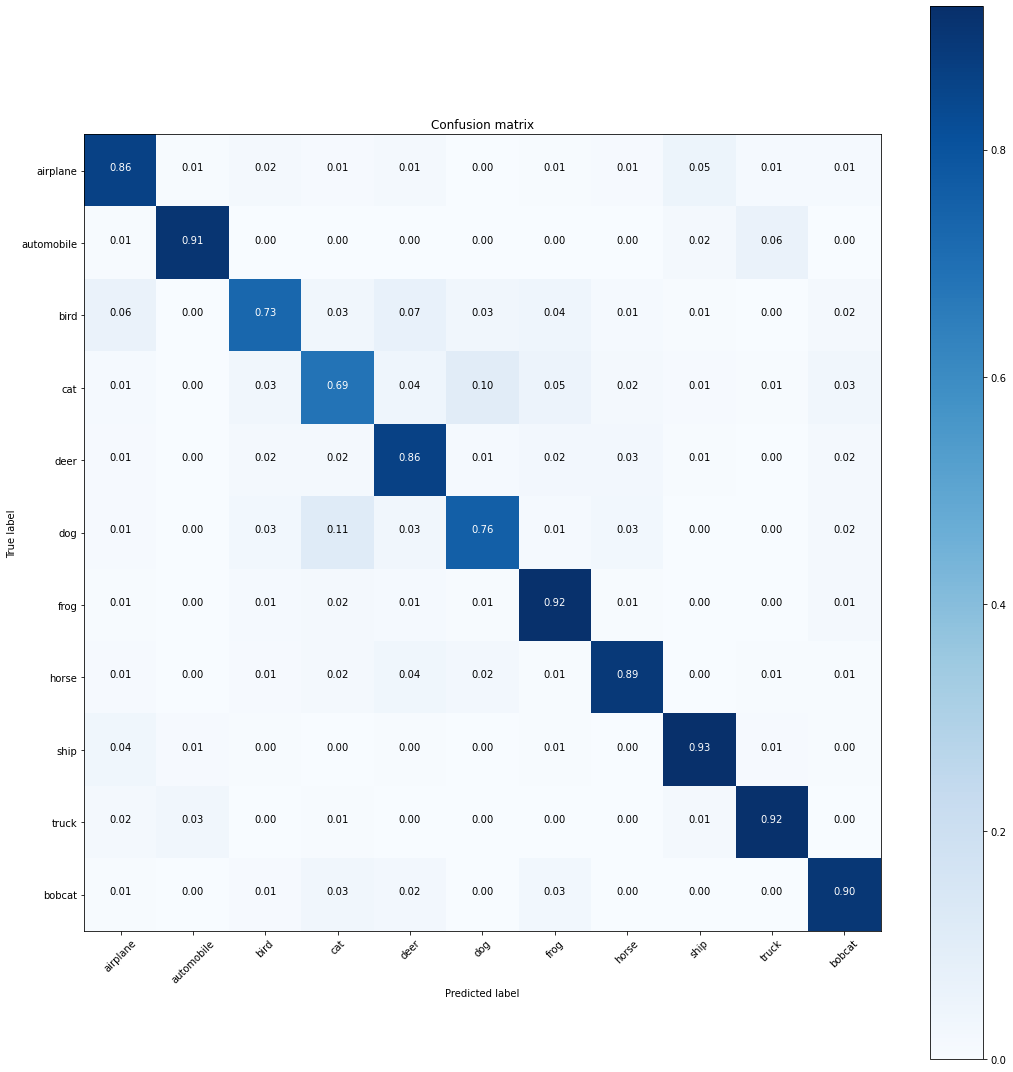

In [28]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [29]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-12].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 10s 6ms/step - loss: 3.0714 - accuracy: 0.1761 - val_loss: 1.7509 - val_accuracy: 0.3804
Epoch 2/50
1719/1719 [==============================] - 9s 5ms/step - loss: 2.2499 - accuracy: 0.3253 - val_loss: 1.4661 - val_accuracy: 0.4755
Epoch 3/50
1719/1719 [==============================] - 9s 5ms/step - loss: 1.8809 - accuracy: 0.4134 - val_loss: 1.3203 - val_accuracy: 0.5311
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6636 - accuracy: 0.4685 - val_loss: 1.2219 - val_accuracy: 0.5684
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 1.5298 - accuracy: 0.5086 - val_loss: 1.1511 - val_accuracy: 0.5949
Epoch 6/50
1719/1719 [==============================] - 9s 5ms/step - loss: 1.4232 - accuracy: 0.5375 - val_loss: 1.1035 - val_accuracy: 0.6145
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 1.3334 - accuracy: 0.5644 - val_loss: 1.0453 - val_accuracy

344/344 [==============================] - 1s 3ms/step - loss: 0.6048 - accuracy: 0.7965
Test Accuracy: 0.7965454459190369
Normalized confusion matrix
[[0.784 0.011 0.016 0.015 0.022 0.004 0.008 0.013 0.073 0.036 0.018]
 [0.012 0.876 0.001 0.002 0.002 0.003 0.005 0.001 0.016 0.082 0.   ]
 [0.067 0.001 0.542 0.044 0.113 0.043 0.085 0.034 0.011 0.012 0.048]
 [0.014 0.002 0.018 0.581 0.058 0.124 0.075 0.031 0.018 0.012 0.067]
 [0.011 0.002 0.009 0.02  0.827 0.016 0.044 0.037 0.01  0.    0.024]
 [0.009 0.    0.017 0.102 0.048 0.724 0.02  0.038 0.002 0.001 0.039]
 [0.004 0.001 0.007 0.028 0.021 0.01  0.9   0.003 0.002 0.002 0.022]
 [0.01  0.001 0.008 0.011 0.048 0.033 0.012 0.848 0.002 0.008 0.019]
 [0.027 0.016 0.002 0.003 0.005 0.002 0.006 0.002 0.911 0.013 0.013]
 [0.017 0.032 0.002 0.008 0.002 0.    0.003 0.004 0.024 0.905 0.003]
 [0.007 0.    0.004 0.026 0.033 0.001 0.055 0.003 0.004 0.003 0.864]]


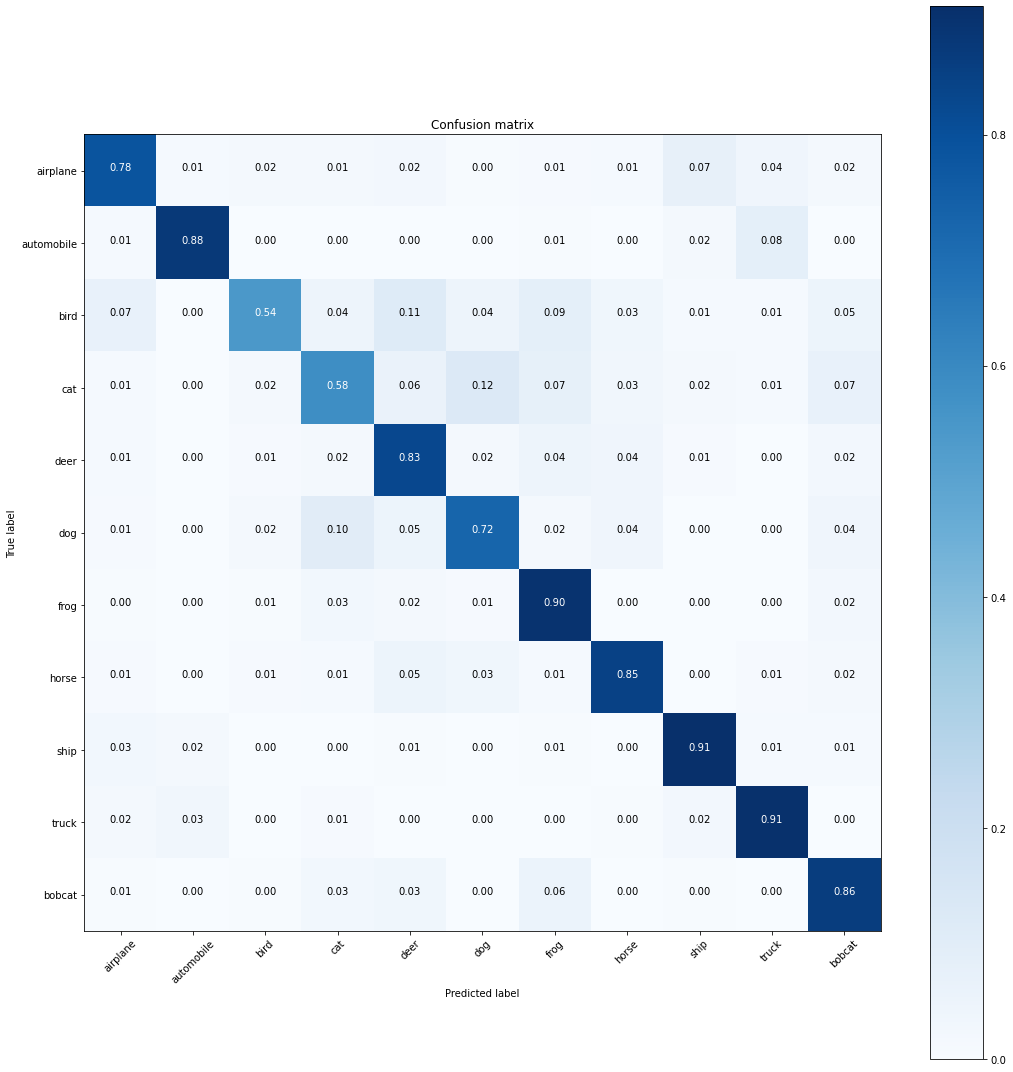

In [30]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [31]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-12].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 3.0578 - accuracy: 0.1750 - val_loss: 1.8014 - val_accuracy: 0.3565
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.2329 - accuracy: 0.3210 - val_loss: 1.4803 - val_accuracy: 0.4711
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.8546 - accuracy: 0.4137 - val_loss: 1.3172 - val_accuracy: 0.5335
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.6358 - accuracy: 0.4742 - val_loss: 1.2200 - val_accuracy: 0.5694
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4771 - accuracy: 0.5219 - val_loss: 1.1570 - val_accuracy: 0.5939
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.3736 - accuracy: 0.5538 - val_loss: 1.0924 - val_accuracy: 0.6193
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2853 - accuracy: 0.5785 - val_loss: 1.0391 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.5318 - accuracy: 0.8255
Test Accuracy: 0.8255454301834106
Normalized confusion matrix
[[0.807 0.011 0.015 0.011 0.024 0.001 0.007 0.01  0.071 0.032 0.011]
 [0.014 0.868 0.001 0.002 0.002 0.002 0.006 0.002 0.023 0.08  0.   ]
 [0.065 0.001 0.601 0.032 0.1   0.044 0.093 0.025 0.01  0.006 0.023]
 [0.009 0.001 0.024 0.646 0.058 0.11  0.077 0.017 0.016 0.009 0.033]
 [0.009 0.001 0.011 0.028 0.856 0.014 0.031 0.029 0.008 0.    0.013]
 [0.009 0.    0.016 0.109 0.049 0.747 0.017 0.031 0.002 0.005 0.015]
 [0.005 0.001 0.009 0.024 0.023 0.007 0.913 0.004 0.001 0.    0.013]
 [0.013 0.002 0.009 0.015 0.044 0.035 0.01  0.854 0.001 0.005 0.012]
 [0.029 0.01  0.002 0.005 0.002 0.    0.003 0.003 0.929 0.011 0.006]
 [0.016 0.027 0.001 0.008 0.    0.    0.003 0.003 0.022 0.916 0.004]
 [0.    0.    0.003 0.014 0.016 0.001 0.019 0.002 0.001 0.    0.944]]


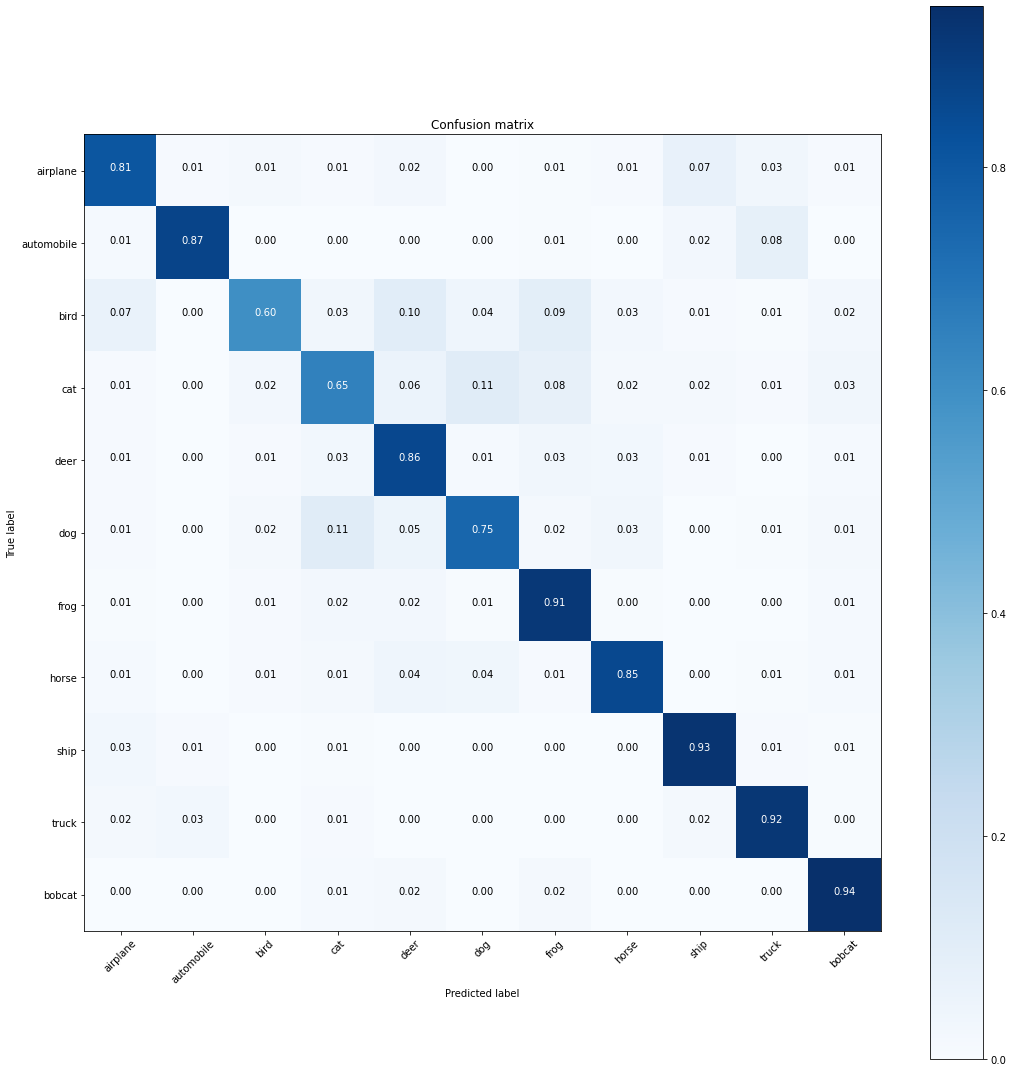

In [32]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [33]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-16].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 4 [-12]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.3))
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 11s 6ms/step - loss: 3.1897 - accuracy: 0.1587 - val_loss: 1.8819 - val_accuracy: 0.3385
Epoch 2/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.4743 - accuracy: 0.2781 - val_loss: 1.6606 - val_accuracy: 0.4124
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.1319 - accuracy: 0.3499 - val_loss: 1.5234 - val_accuracy: 0.4665
Epoch 4/50
1719/1719 [==============================] - 10s 6ms/step - loss: 1.9112 - accuracy: 0.4008 - val_loss: 1.4178 - val_accuracy: 0.5059
Epoch 5/50
1719/1719 [==============================] - 10s 6ms/step - loss: 1.7493 - accuracy: 0.4460 - val_loss: 1.3418 - val_accuracy: 0.5320
Epoch 6/50
1719/1719 [==============================] - 10s 6ms/step - loss: 1.6313 - accuracy: 0.4783 - val_loss: 1.2671 - val_accuracy: 0.5571
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5424 - accuracy: 0.5000 - val_loss: 1.2099 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.6170 - accuracy: 0.7864
Test Accuracy: 0.7863636612892151
Normalized confusion matrix
[[0.784 0.014 0.028 0.008 0.032 0.002 0.011 0.012 0.076 0.027 0.006]
 [0.022 0.858 0.001 0.001 0.001 0.004 0.007 0.003 0.026 0.077 0.   ]
 [0.066 0.002 0.578 0.027 0.128 0.053 0.086 0.03  0.007 0.004 0.019]
 [0.014 0.002 0.035 0.502 0.089 0.164 0.115 0.029 0.016 0.013 0.021]
 [0.014 0.001 0.018 0.023 0.829 0.012 0.043 0.04  0.008 0.    0.012]
 [0.007 0.    0.027 0.101 0.058 0.708 0.032 0.045 0.007 0.001 0.014]
 [0.006 0.001 0.021 0.018 0.024 0.011 0.898 0.005 0.002 0.001 0.013]
 [0.01  0.002 0.014 0.014 0.058 0.047 0.013 0.82  0.002 0.012 0.008]
 [0.037 0.019 0.004 0.004 0.005 0.003 0.008 0.006 0.896 0.016 0.002]
 [0.026 0.041 0.001 0.007 0.002 0.    0.005 0.006 0.021 0.887 0.004]
 [0.007 0.    0.004 0.012 0.032 0.001 0.045 0.002 0.004 0.003 0.89 ]]


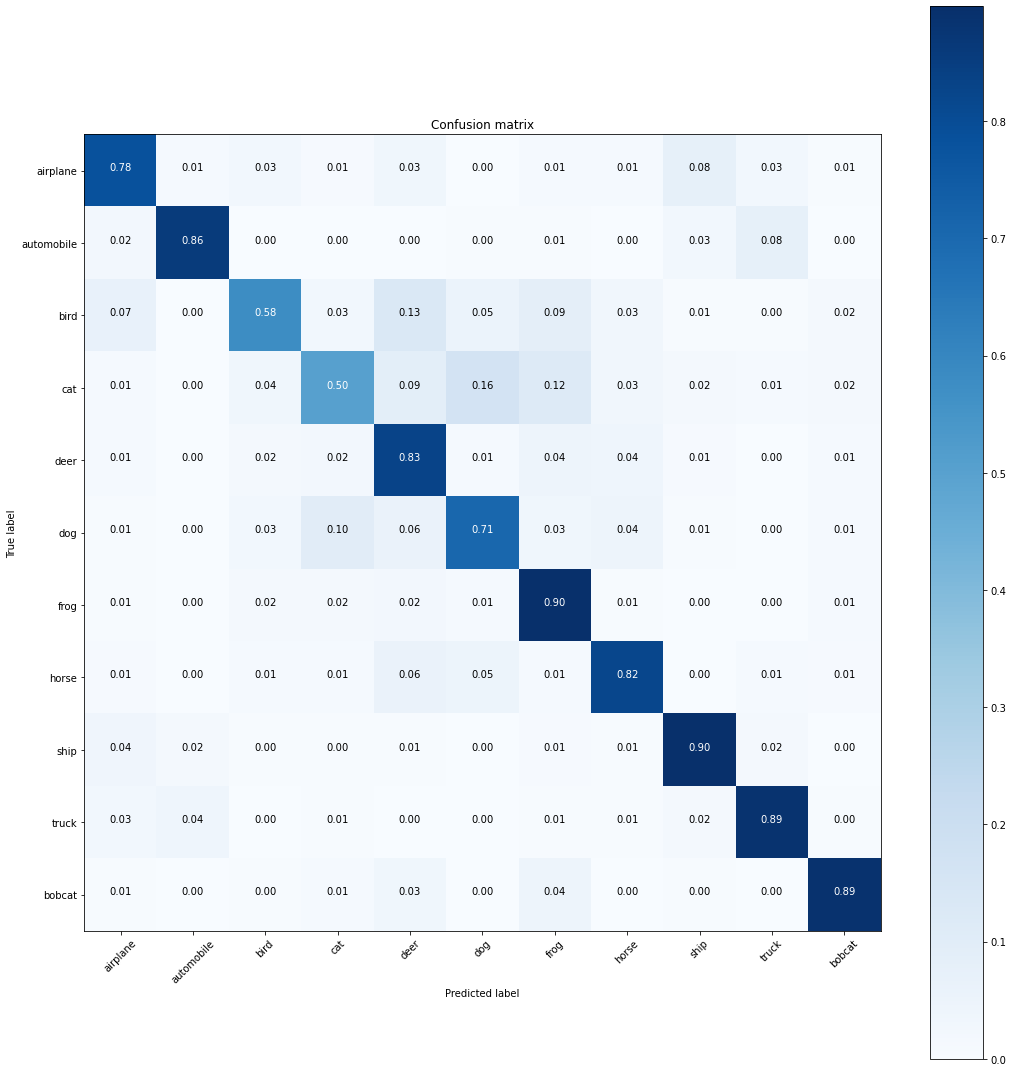

In [34]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [35]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-12].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.9968 - accuracy: 0.1824 - val_loss: 1.7510 - val_accuracy: 0.3882
Epoch 2/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.2118 - accuracy: 0.3316 - val_loss: 1.4754 - val_accuracy: 0.4789
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.8323 - accuracy: 0.4239 - val_loss: 1.3238 - val_accuracy: 0.5351
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.6227 - accuracy: 0.4832 - val_loss: 1.2143 - val_accuracy: 0.5736
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.4699 - accuracy: 0.5252 - val_loss: 1.1486 - val_accuracy: 0.6032
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.3651 - accuracy: 0.5571 - val_loss: 1.0955 - val_accuracy: 0.6220
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.2787 - accuracy: 0.5812 - val_loss: 1.0393 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.5321 - accuracy: 0.8185
Test Accuracy: 0.8185454607009888
Normalized confusion matrix
[[0.812 0.012 0.019 0.012 0.018 0.    0.013 0.007 0.064 0.028 0.015]
 [0.017 0.869 0.001 0.002 0.002 0.002 0.006 0.002 0.018 0.081 0.   ]
 [0.061 0.    0.616 0.029 0.102 0.035 0.088 0.021 0.012 0.005 0.031]
 [0.01  0.003 0.029 0.611 0.054 0.13  0.088 0.018 0.017 0.009 0.031]
 [0.011 0.001 0.014 0.022 0.842 0.016 0.042 0.028 0.008 0.    0.016]
 [0.005 0.    0.023 0.114 0.048 0.738 0.024 0.027 0.003 0.002 0.016]
 [0.004 0.001 0.014 0.017 0.022 0.005 0.922 0.004 0.002 0.    0.009]
 [0.01  0.002 0.015 0.019 0.052 0.033 0.012 0.837 0.002 0.007 0.011]
 [0.03  0.012 0.003 0.003 0.003 0.    0.007 0.003 0.92  0.012 0.007]
 [0.02  0.034 0.001 0.006 0.001 0.002 0.006 0.001 0.02  0.906 0.003]
 [0.003 0.    0.003 0.019 0.017 0.001 0.022 0.002 0.001 0.001 0.931]]


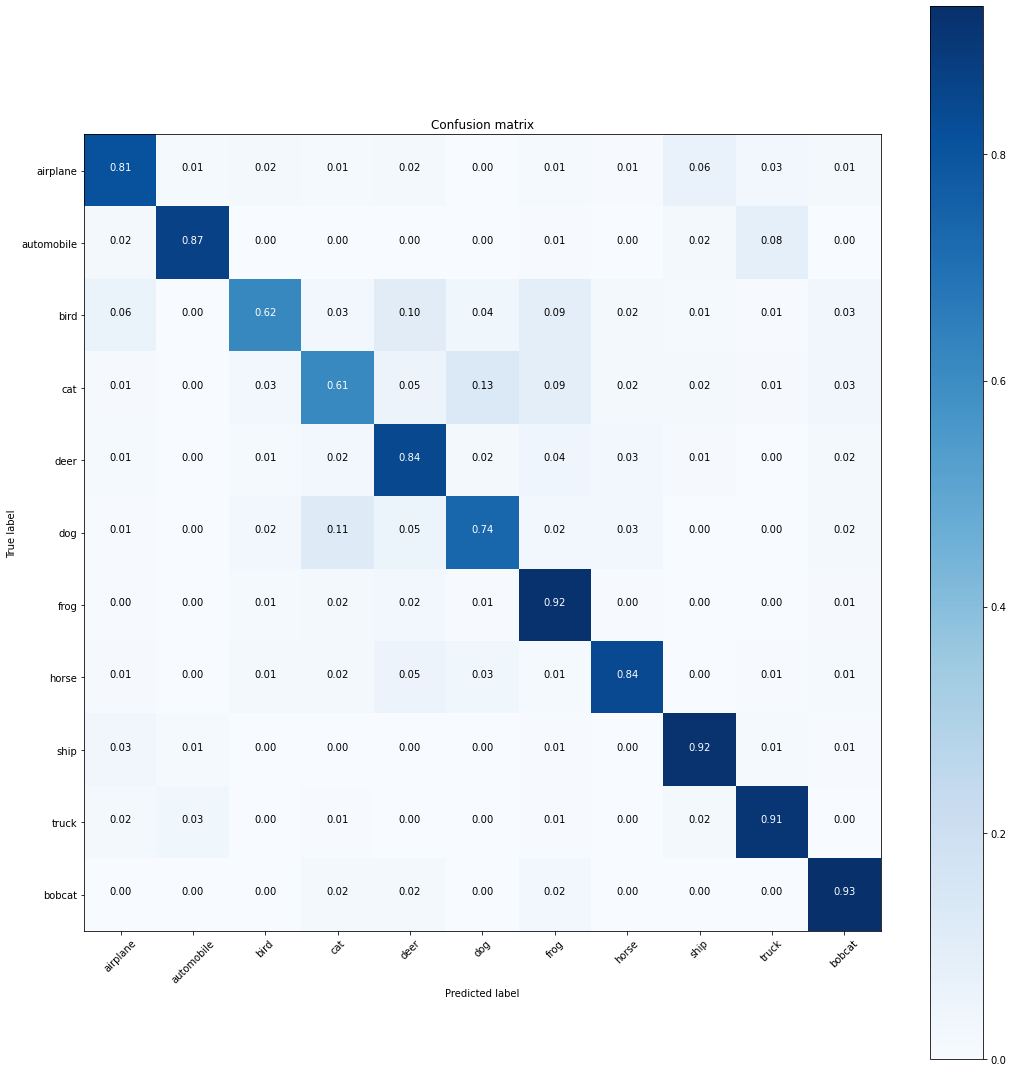

In [36]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [37]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-18].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 3 [-16]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 4 [-12]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.3))
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 11s 6ms/step - loss: 3.3491 - accuracy: 0.1309 - val_loss: 2.1930 - val_accuracy: 0.2065
Epoch 2/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.7757 - accuracy: 0.2096 - val_loss: 1.9781 - val_accuracy: 0.2826
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.4549 - accuracy: 0.2676 - val_loss: 1.8386 - val_accuracy: 0.3322
Epoch 4/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2346 - accuracy: 0.3115 - val_loss: 1.7270 - val_accuracy: 0.3757
Epoch 5/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.0608 - accuracy: 0.3521 - val_loss: 1.6556 - val_accuracy: 0.4080
Epoch 6/50
1719/1719 [==============================] - 11s 6ms/step - loss: 1.9187 - accuracy: 0.3883 - val_loss: 1.5900 - val_accuracy: 0.4338
Epoch 7/50
1719/1719 [==============================] - 11s 6ms/step - loss: 1.8170 - accuracy: 0.4154 - val_loss: 1.5435 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.7517 - accuracy: 0.7398
Test Accuracy: 0.7398181557655334
Normalized confusion matrix
[[0.653 0.018 0.051 0.015 0.045 0.004 0.018 0.013 0.119 0.051 0.013]
 [0.009 0.797 0.003 0.003 0.004 0.002 0.022 0.003 0.052 0.105 0.   ]
 [0.04  0.001 0.513 0.027 0.177 0.048 0.126 0.026 0.015 0.007 0.02 ]
 [0.011 0.009 0.033 0.439 0.093 0.164 0.158 0.029 0.014 0.012 0.038]
 [0.007 0.001 0.023 0.019 0.8   0.016 0.068 0.037 0.012 0.    0.017]
 [0.005 0.002 0.029 0.129 0.082 0.637 0.052 0.034 0.004 0.002 0.024]
 [0.002 0.002 0.013 0.017 0.033 0.011 0.907 0.003 0.003 0.    0.009]
 [0.009 0.002 0.02  0.02  0.108 0.069 0.024 0.719 0.006 0.014 0.009]
 [0.022 0.022 0.008 0.004 0.01  0.004 0.012 0.003 0.894 0.016 0.005]
 [0.012 0.033 0.004 0.001 0.006 0.003 0.011 0.004 0.035 0.89  0.001]
 [0.003 0.001 0.003 0.01  0.019 0.003 0.06  0.004 0.004 0.004 0.889]]


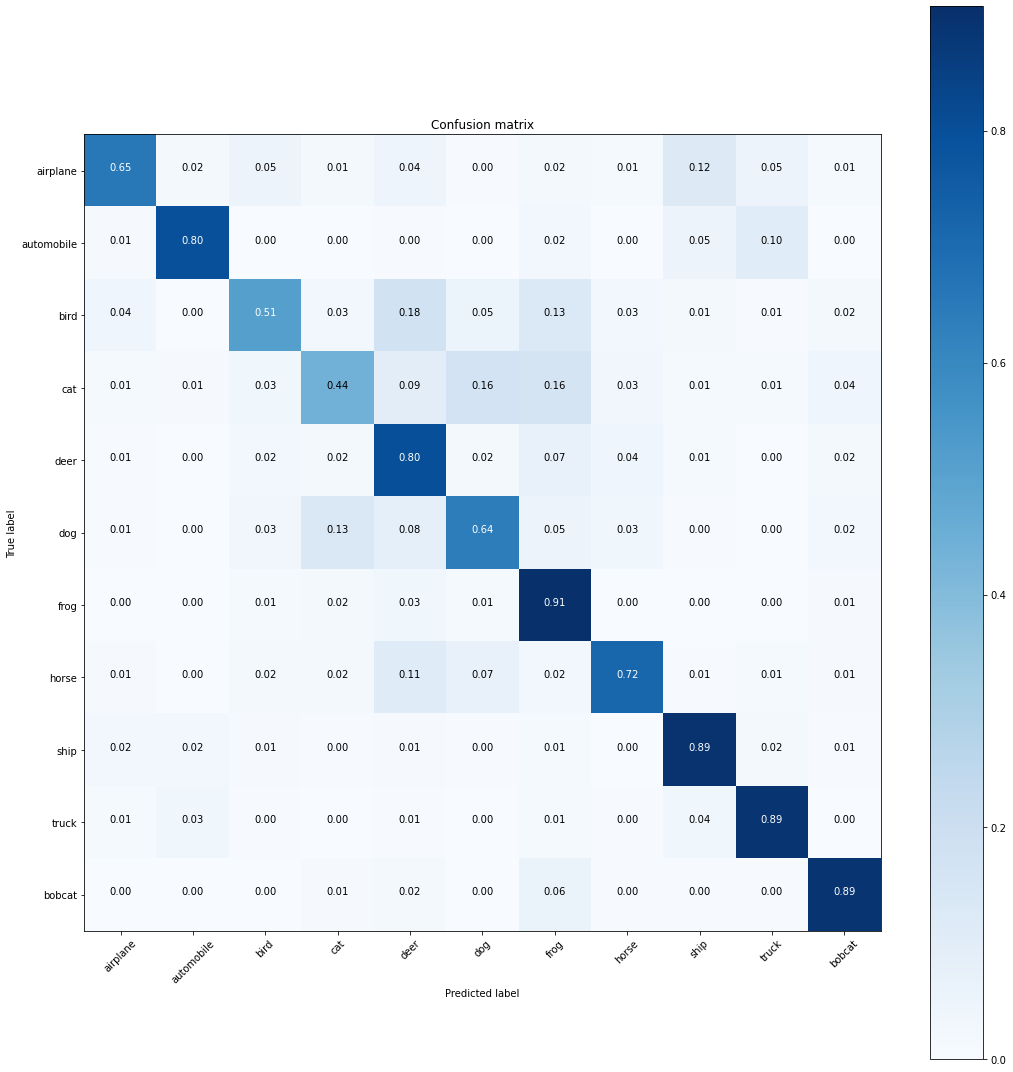

In [38]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [39]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-18].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 3 [-16]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 4 [-12]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.3))
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 3.2901 - accuracy: 0.1457 - val_loss: 2.2896 - val_accuracy: 0.1915
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.7825 - accuracy: 0.2184 - val_loss: 2.0977 - val_accuracy: 0.2545
Epoch 3/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.4840 - accuracy: 0.2660 - val_loss: 1.9060 - val_accuracy: 0.3250
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.2665 - accuracy: 0.3082 - val_loss: 1.7901 - val_accuracy: 0.3732
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.0955 - accuracy: 0.3436 - val_loss: 1.6786 - val_accuracy: 0.4104
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.9663 - accuracy: 0.3731 - val_loss: 1.6337 - val_accuracy: 0.4327
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 1.8572 - accuracy: 0.4003 - val_loss: 1.5906 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.7306 - accuracy: 0.7456
Test Accuracy: 0.7456363439559937
Normalized confusion matrix
[[0.648 0.015 0.054 0.015 0.031 0.002 0.02  0.01  0.139 0.058 0.008]
 [0.01  0.799 0.003 0.006 0.003 0.001 0.016 0.003 0.05  0.109 0.   ]
 [0.047 0.001 0.477 0.042 0.154 0.064 0.15  0.019 0.023 0.004 0.019]
 [0.008 0.002 0.03  0.48  0.083 0.176 0.154 0.017 0.019 0.016 0.015]
 [0.008 0.001 0.016 0.026 0.786 0.024 0.087 0.028 0.014 0.002 0.008]
 [0.006 0.    0.017 0.13  0.068 0.673 0.051 0.03  0.008 0.004 0.013]
 [0.002 0.    0.012 0.018 0.025 0.012 0.924 0.    0.003 0.    0.004]
 [0.01  0.004 0.026 0.022 0.105 0.074 0.02  0.714 0.005 0.017 0.003]
 [0.021 0.018 0.005 0.006 0.007 0.004 0.008 0.002 0.91  0.017 0.002]
 [0.008 0.033 0.002 0.003 0.002 0.001 0.011 0.004 0.035 0.901 0.   ]
 [0.    0.001 0.003 0.013 0.012 0.003 0.07  0.001 0.005 0.002 0.89 ]]


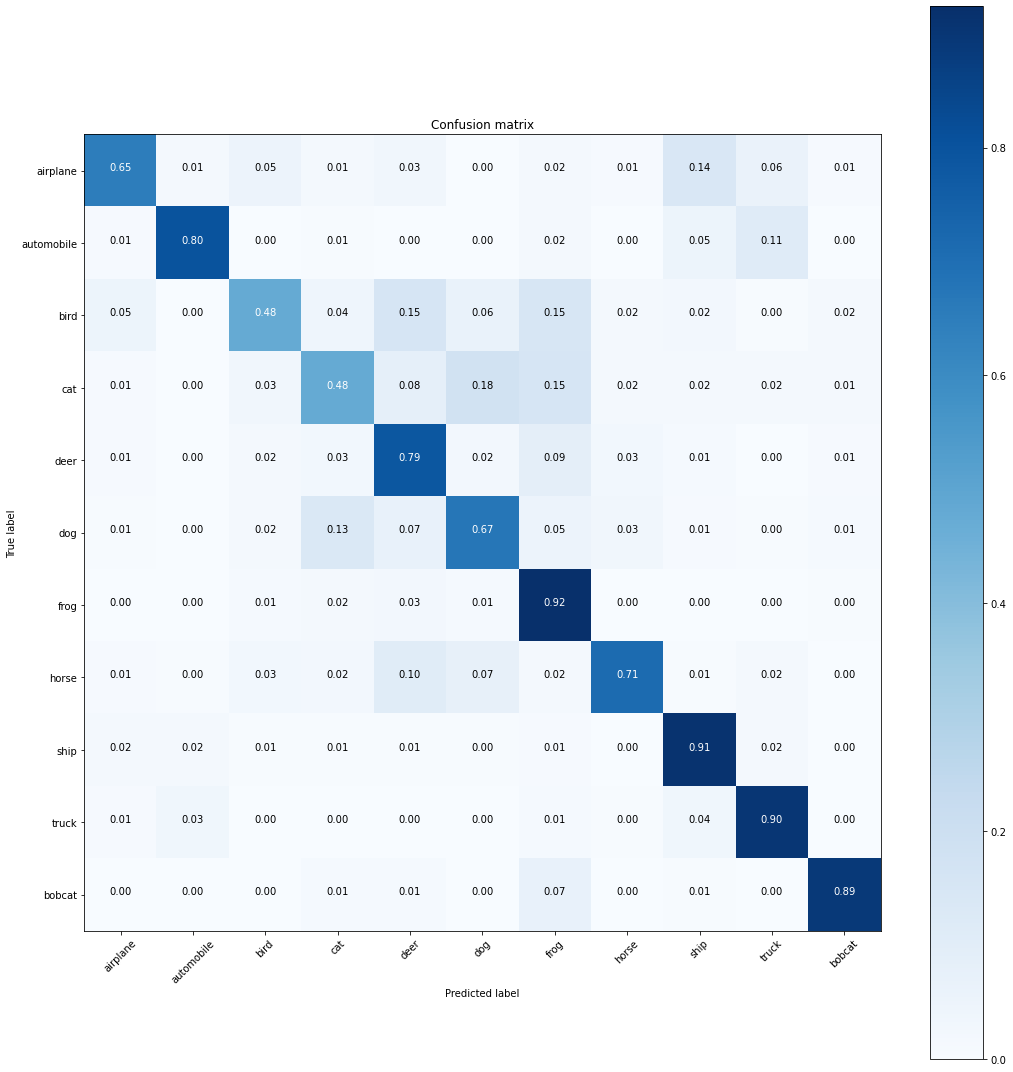

In [40]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

In [41]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-22].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 2 [-18]
new_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.2))
# Layer 3 [-16]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 4 [-12]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.3))
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
new_model.layers[0].trainable = False
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 13s 7ms/step - loss: 3.4527 - accuracy: 0.1224 - val_loss: 2.5049 - val_accuracy: 0.1358
Epoch 2/50
1719/1719 [==============================] - 11s 7ms/step - loss: 3.0139 - accuracy: 0.1759 - val_loss: 2.3241 - val_accuracy: 0.1912
Epoch 3/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.7088 - accuracy: 0.2211 - val_loss: 2.1786 - val_accuracy: 0.2339
Epoch 4/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.5192 - accuracy: 0.2556 - val_loss: 2.0664 - val_accuracy: 0.2713
Epoch 5/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.3403 - accuracy: 0.2866 - val_loss: 2.0078 - val_accuracy: 0.2958
Epoch 6/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.2223 - accuracy: 0.3050 - val_loss: 1.9610 - val_accuracy: 0.3141
Epoch 7/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.1129 - accuracy: 0.3322 - val_loss: 1.9141 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.9033 - accuracy: 0.6904
Test Accuracy: 0.6903636455535889
Normalized confusion matrix
[[0.59  0.022 0.057 0.02  0.038 0.005 0.025 0.012 0.139 0.07  0.022]
 [0.007 0.775 0.003 0.006 0.002 0.003 0.024 0.004 0.025 0.148 0.003]
 [0.046 0.004 0.435 0.028 0.139 0.079 0.141 0.019 0.015 0.013 0.081]
 [0.006 0.004 0.034 0.375 0.083 0.14  0.176 0.02  0.014 0.02  0.128]
 [0.009 0.002 0.021 0.023 0.695 0.013 0.108 0.031 0.012 0.001 0.085]
 [0.003 0.002 0.031 0.164 0.079 0.53  0.077 0.029 0.005 0.009 0.071]
 [0.003 0.001 0.015 0.019 0.026 0.013 0.842 0.001 0.005 0.001 0.074]
 [0.004 0.005 0.026 0.021 0.134 0.075 0.032 0.648 0.002 0.021 0.032]
 [0.022 0.028 0.008 0.011 0.009 0.002 0.015 0.001 0.859 0.031 0.014]
 [0.005 0.039 0.002 0.004 0.008 0.001 0.008 0.003 0.027 0.885 0.018]
 [0.    0.001 0.    0.003 0.005 0.    0.028 0.001 0.001 0.001 0.96 ]]


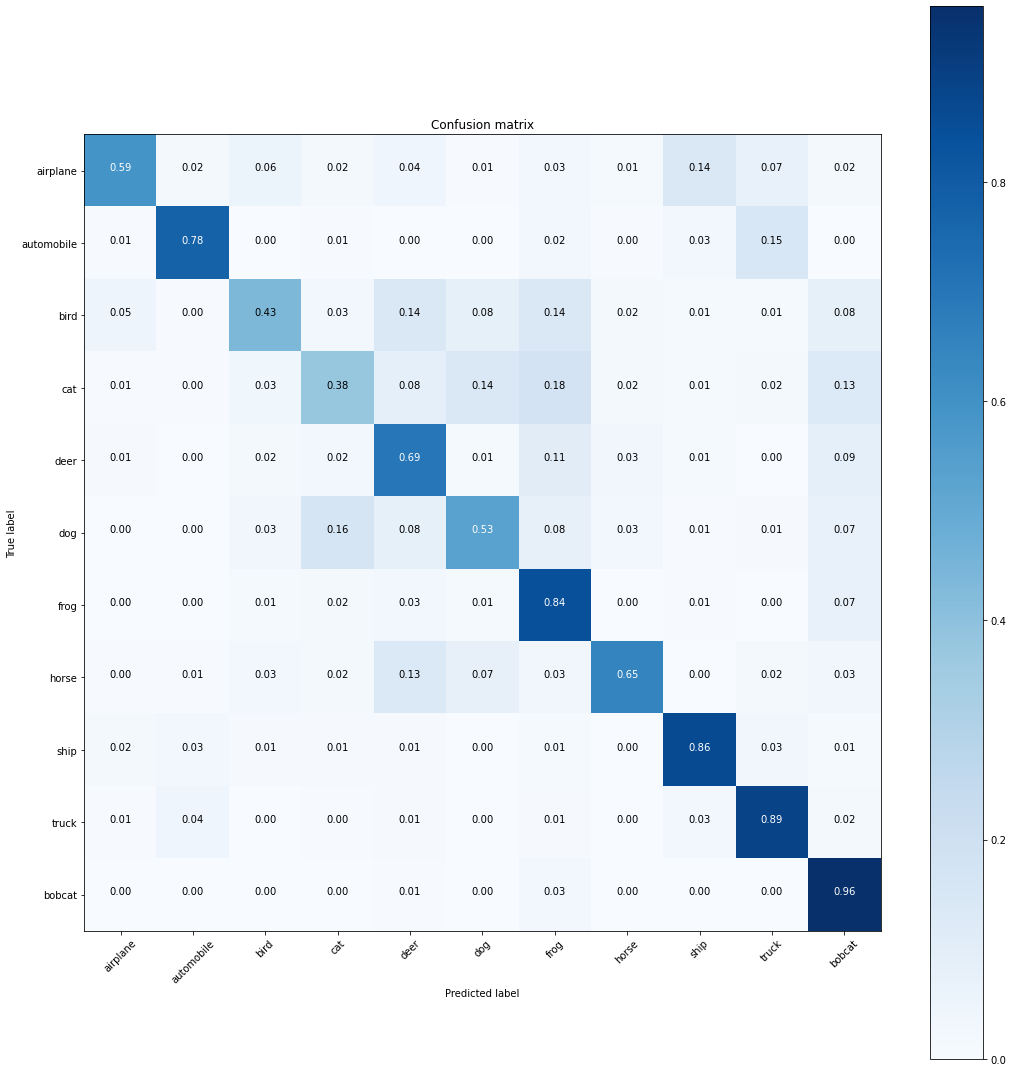

In [42]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
fr_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
fr_cat_acc.insert(0, cm[3][3])
fr_bobcat_acc.insert(0, cm[10][10])

In [43]:
model_transferred=keras.models.load_model('./models/model.h5')
model_transferred = keras.Model(inputs=model_transferred.input, outputs=model_transferred.layers[-22].output)
new_model = keras.Sequential()
new_model.add(model_transferred)
# Layer 2 [-18]
new_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.2))
# Layer 3 [-16]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 4 [-12]
new_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.3))
# Layer 5 [-10]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
# Layer 6 [-6]
new_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
new_model.add(BatchNormalization())
new_model.add(MaxPool2D((2, 2)))
new_model.add(Dropout(0.4))
# Layer 7 [-2]
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
# Output
new_model.add(Dense(11, activation='softmax'))
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat),callbacks=callback)

Epoch 1/50
1719/1719 [==============================] - 14s 8ms/step - loss: 3.4237 - accuracy: 0.1284 - val_loss: 2.3688 - val_accuracy: 0.1564
Epoch 2/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.9728 - accuracy: 0.1852 - val_loss: 2.2582 - val_accuracy: 0.2045
Epoch 3/50
1719/1719 [==============================] - 13s 7ms/step - loss: 2.6725 - accuracy: 0.2302 - val_loss: 2.2315 - val_accuracy: 0.2275
Epoch 4/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.4840 - accuracy: 0.2628 - val_loss: 2.1719 - val_accuracy: 0.2461
Epoch 5/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.3292 - accuracy: 0.2891 - val_loss: 2.1164 - val_accuracy: 0.2725
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.2046 - accuracy: 0.3135 - val_loss: 2.0693 - val_accuracy: 0.2950
Epoch 7/50
1719/1719 [==============================] - 12s 7ms/step - loss: 2.1062 - accuracy: 0.3335 - val_loss: 2.0845 - val_ac

344/344 [==============================] - 1s 3ms/step - loss: 0.9941 - accuracy: 0.6613
Test Accuracy: 0.6612727046012878
Normalized confusion matrix
[[0.549 0.019 0.087 0.011 0.045 0.002 0.03  0.01  0.134 0.051 0.062]
 [0.009 0.714 0.004 0.004 0.004 0.002 0.047 0.002 0.058 0.143 0.013]
 [0.041 0.002 0.424 0.031 0.143 0.037 0.169 0.016 0.013 0.004 0.12 ]
 [0.003 0.002 0.039 0.327 0.072 0.106 0.219 0.013 0.012 0.008 0.199]
 [0.007 0.002 0.014 0.017 0.682 0.005 0.138 0.022 0.008 0.001 0.104]
 [0.003 0.001 0.039 0.156 0.088 0.454 0.092 0.025 0.006 0.004 0.132]
 [0.001 0.    0.018 0.013 0.019 0.008 0.847 0.001 0.002 0.    0.091]
 [0.004 0.002 0.04  0.016 0.153 0.045 0.042 0.623 0.003 0.014 0.058]
 [0.02  0.016 0.003 0.005 0.007 0.003 0.019 0.002 0.864 0.017 0.044]
 [0.01  0.029 0.003 0.003 0.01  0.002 0.024 0.008 0.032 0.829 0.05 ]
 [0.    0.    0.    0.001 0.001 0.    0.036 0.    0.    0.001 0.961]]


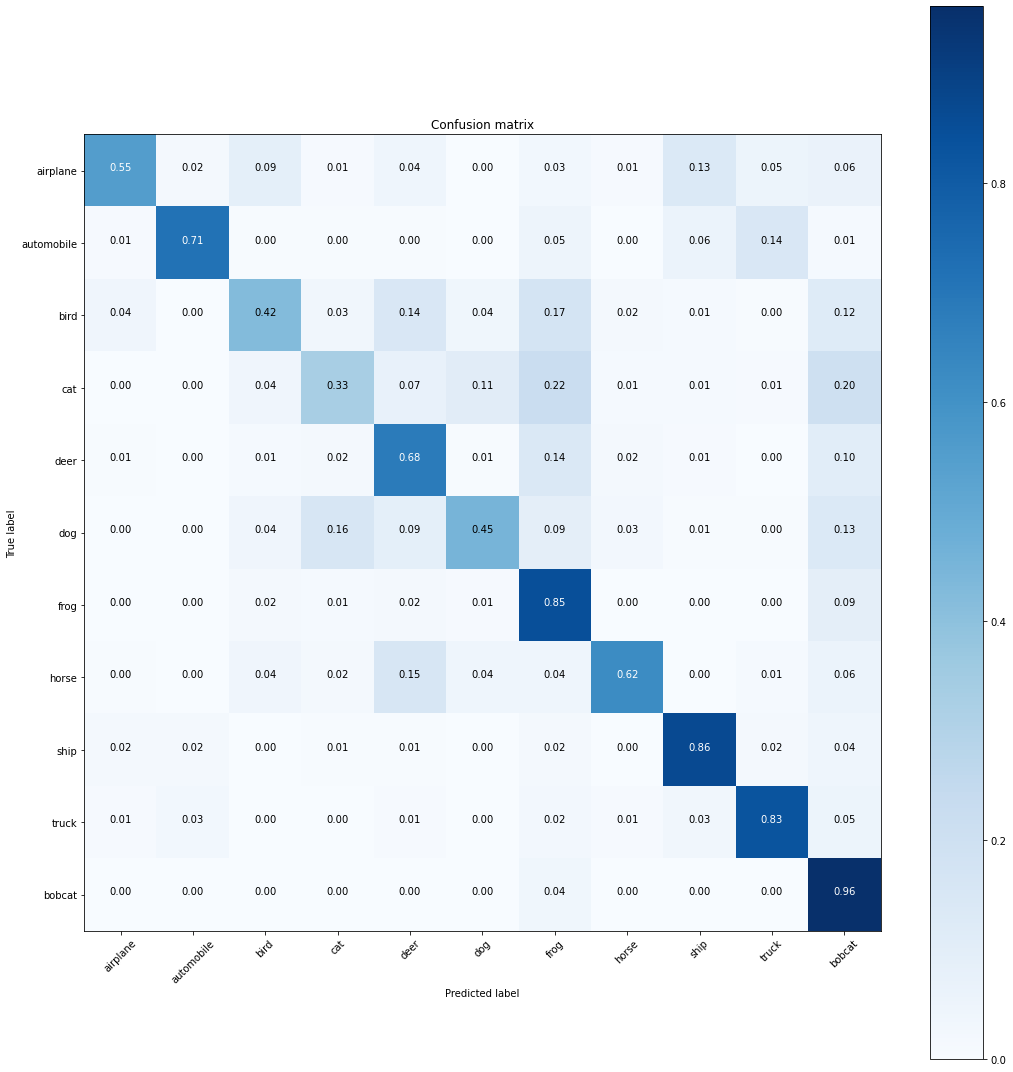

In [44]:
evaluation = new_model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))
tl_models_acc.insert(0, evaluation[1])

p_test = new_model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)
tl_cat_acc.insert(0, cm[3][3])
tl_bobcat_acc.insert(0, cm[10][10])

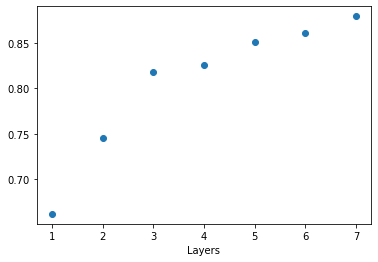

In [46]:
x = range(1, len(tl_models_acc)+1)

plt.scatter(x, tl_models_acc, marker="o")
plt.xlabel('Layers')
plt.show()

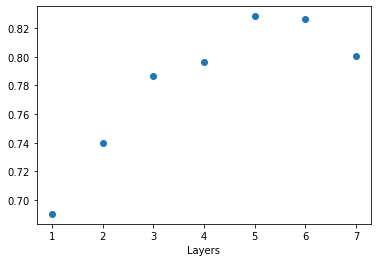

In [50]:
x = range(1, len(fr_models_acc)+1)

plt.scatter(x, fr_models_acc, marker="o")
plt.xlabel('Layers')
plt.show()

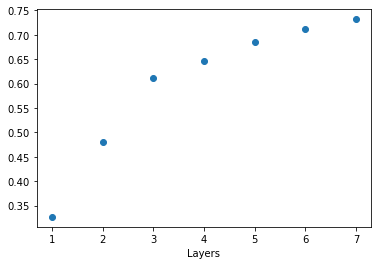

In [55]:
x = range(1, len(tl_cat_acc)+1)

plt.scatter(x, [ac / 1000 for ac in tl_cat_acc], marker="o")
plt.xlabel('Layers')
plt.show()

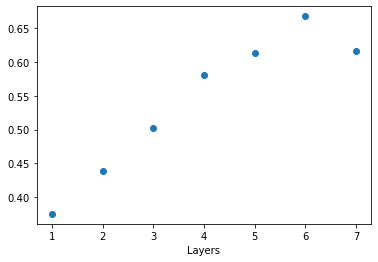

In [56]:
x = range(1, len(fr_cat_acc)+1)

plt.scatter(x, [ac / 1000 for ac in fr_cat_acc], marker="o")
plt.xlabel('Layers')
plt.show()

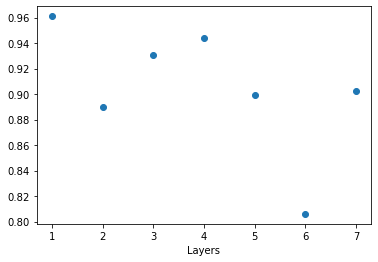

In [57]:
x = range(1, len(fr_cat_acc)+1)

plt.scatter(x, [ac / 1000 for ac in tl_bobcat_acc], marker="o")
plt.xlabel('Layers')
plt.show()

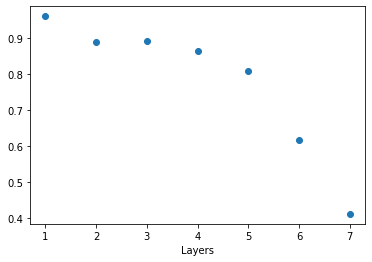

In [58]:
x = range(1, len(fr_cat_acc)+1)

plt.scatter(x, [ac / 1000 for ac in fr_bobcat_acc], marker="o")
plt.xlabel('Layers')
plt.show()

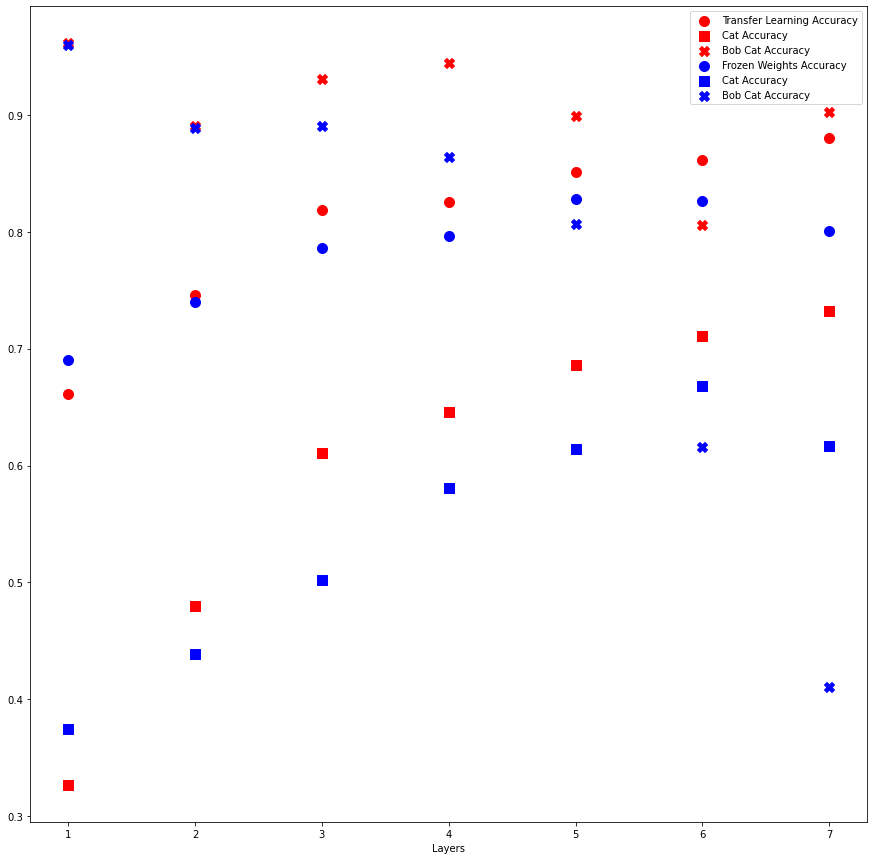

In [64]:
plt.figure(figsize=(15,15))
plt.scatter(x, tl_models_acc, label='Transfer Learning Accuracy', marker="o", color='red', s=100)
plt.scatter(x, [ac / 1000 for ac in tl_cat_acc], label='Cat Accuracy', marker="s", color='red', s=100)
plt.scatter(x, [ac / 1000 for ac in tl_bobcat_acc], label='Bob Cat Accuracy', marker="X", color='red', s=100)
plt.scatter(x, fr_models_acc, label='Frozen Weights Accuracy', marker="o", color='blue', s=100)
plt.scatter(x, [ac / 1000 for ac in fr_cat_acc], label='Cat Accuracy', marker="s", color='blue', s=100)
plt.scatter(x, [ac / 1000 for ac in fr_bobcat_acc], label='Bob Cat Accuracy', marker="X", color='blue', s=100)
plt.xlabel('Layers')
plt.legend()
plt.show()

For this experiment, learning rate was selected on the heuristic that learning rate should be reduced by a factor of ten for superficial layers, which are more important for re-learning classification, and deeper convolutional layers should be reduced by a factor of 100, for finer adjustment of features, instead of re-learning them. The overall accuracy of transfer learning and locking the weights in layers demonstrates similar results to the paper examined in class. However, it is interesting to notice that by examining bob cats and normal cats, we see a different trend in the results. Particularly, in the frozen layers, bob cat accuracy seems to be inversely proportional to cat accuracy. This could be due to bob cats and normal cats being very similar, as the model over-generalizes, incorrectly predicting cats to be bob cats as shown in the confusion matrices. It is important to notice, however, that more epochs could have been trained for each model, and that perhaps they could have performed better given enough time or by increasing learning rate, but this goes against the nature of transfer learning as it would be equivalent to retraining the network.